In [16]:
#========================= Imports =======================
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("olist_public_dataset_v2.csv")
data.set_index('order_id')
data.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [3]:
#========================= Classificação inicial dos comentários =======================

lista_classificacao= []
for i in data.review_score:
    
    if i == 5 or i == 4:
        classificacao = 1
        
    if i ==3:
        classificacao = 0
        
    if i == 2 or i == 1:
        classificacao = -1
        
    lista_classificacao.append(classificacao)

    
#========================= Cálculo do delta do tempo de entrega =======================

data["Classificacao"]=lista_classificacao
data['delivery_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['aproved_date'] = pd.to_datetime(data['order_aproved_at'])
data['delta time'] = data['delivery_date'] - data['aproved_date']
data['delta_days'] = (data['delta time'].dt.days)


data.order_delivered_customer_date[0]

'2017-02-06 11:04:24.154259'

In [2]:
#========================= Função que que dummifica colunas =======================

def dummify(data, column_name):

    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [5]:
#========================= Aplica a função dummify no dataset =======================

data = dummify(data, 'customer_state')

In [6]:
#========================= Organização do dataset com as colunas de cada estado =======================

df = data[['order_products_value', 'order_freight_value', 'product_description_lenght', 'product_photos_qty', 'review_score', 'review_comment_message', 'delta_days', 'Classificacao', 'customer_state_AC', 'customer_state_AL', 'customer_state_AM',
       'customer_state_AP', 'customer_state_BA', 'customer_state_CE',
       'customer_state_DF', 'customer_state_ES', 'customer_state_GO',
       'customer_state_MA', 'customer_state_MG', 'customer_state_MS',
       'customer_state_MT', 'customer_state_PA', 'customer_state_PB',
       'customer_state_PE', 'customer_state_PI', 'customer_state_PR',
       'customer_state_RJ', 'customer_state_RN', 'customer_state_RO',
       'customer_state_RR', 'customer_state_RS', 'customer_state_SC',
       'customer_state_SE', 'customer_state_SP', 'customer_state_TO']]
df = df.dropna()

print(len(df))
dados_treinamento, dados_teste = train_test_split(df, test_size=0.3)
print(len(dados_treinamento))
print(len(dados_teste))
data.head()

40892
28624
12268


,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,1,0,0,0,0,0,0,0,0,0
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,0,0,0,0,0,0,0,0,0,0
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,0,0,0,0,0,0,0,0,1,0
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,0,0,0,0,0,0,0,0,0,0
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train= dados_treinamento.Classificacao
x_train= dados_treinamento.review_comment_message
x_test= dados_teste.review_comment_message
y_test= dados_teste.Classificacao

In [8]:
#============================================ Pipeline ============================================
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#========================= Cria o modelo =======================
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", MultinomialNB())
])

#========================= Treina o modelo =======================
model.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [9]:
#========================= Testa o modelo =======================
pos_prob = []
neg_prob = []
neu_prob = []
probs = model.predict_proba(x_train)
for e in probs:
    neg_prob.append(e[0])
    neu_prob.append(e[1])
    pos_prob.append(e[2])
dados_treinamento['pos_prob'] = pos_prob
dados_treinamento['neg_prob'] = neg_prob
dados_treinamento['neu_prob'] = neu_prob
dados_treinamento.head()


pos_prob = []
neg_prob = []
neu_prob = []
probs = model.predict_proba(x_test)
for e in probs:
    neg_prob.append(e[0])
    neu_prob.append(e[1])
    pos_prob.append(e[2])
dados_teste['pos_prob'] = pos_prob
dados_teste['neg_prob'] = neg_prob
dados_teste['neu_prob'] = neu_prob

/Users/Gustavo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Gustavo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Gustavo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [10]:
dados_treinamento.to_csv('train_data.csv')
dados_teste.to_csv('test_data.csv')

In [11]:
data.columns

Index(['order_id', 'order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date',
       'customer_id', 'customer_city', 'customer_zip_code_prefix',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_id',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'Classificacao', 'delivery_date',
       'aproved_date', 'delta time', 'delta_days', 'customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'cus

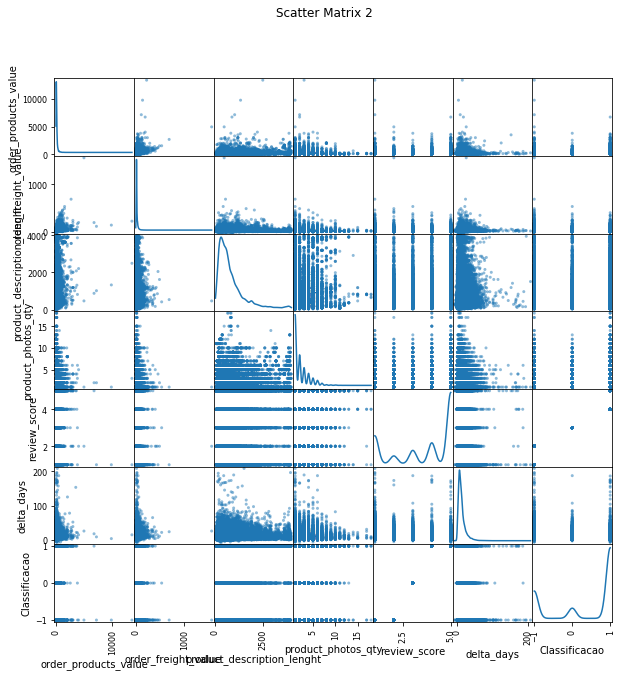

In [15]:
#========================= Scatter matrix =======================

dados =  df[['order_products_value', 'order_freight_value', 
             'product_description_lenght', 'product_photos_qty', 'review_score', 
             'review_comment_message', 'delta_days', 'Classificacao']]

import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(dados,figsize=(10,10), diagonal='kde');
plt.suptitle('Scatter Matrix')
plt.show()